In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import load_experiments

from experiment import experiments_to_df

from analysis import extract_needed

In [2]:
experiments_22, df_22 = load_experiments('../results/experim_22.json')

experiments_25, df_25 = load_experiments('../results/experim_25.json')

experiments_30, df_30 = load_experiments('../results/experim_30.json')

In [3]:
df_30

,noise_var,train_window,weight_function,mixing_type,alpha_function,mean,random_0,random_1,random_2,random_3
11,1,10,1 / ((x + 1) * (ln(x + 1))^2),increasing past-0.5,1 / (x + 1),119783.90,107377.34,94869.99,152601.49,124286.77
6,1,10,1 / ((x + 1) * (ln(x + 1))^2),increasing past-2,1 / (x + 1),126865.67,114830.23,97670.19,165212.1,129750.17
10,1,10,1 / ((x + 1) * (ln(x + 1))^2),increasing past-4,1 / (x + 1),133447.69,120696.17,100887.66,176025.38,136181.55
8,1,10,1 / (x^1.01),increasing past-0.5,1 / (x + 1),110151.26,95790.03,91657.96,134408.92,118748.11
0,1,10,1 / (x^1.01),increasing past-2,1 / (x + 1),111563.64,97351.61,91680.87,137792.07,119430.0
1,1,10,1 / (x^1.01),increasing past-4,1 / (x + 1),113922.30,99502.92,92587.62,141867.22,121731.44
2,1,10,1 / c,increasing past-0.5,1 / (x + 1),118155.78,101917.77,97869.72,139833.4,133002.21
7,1,10,1 / c,increasing past-2,1 / (x + 1),116216.44,100087.38,96584.12,137546.31,130647.95
9,1,10,1 / c,increasing past-4,1 / (x + 1),115299.68,99079.53,96018.03,136686.99,129414.19
4,1,10,1 / (x^0.5),increasing past-0.5,1 / (x + 1),112279.88,96776.12,94644.61,134203.36,123495.45


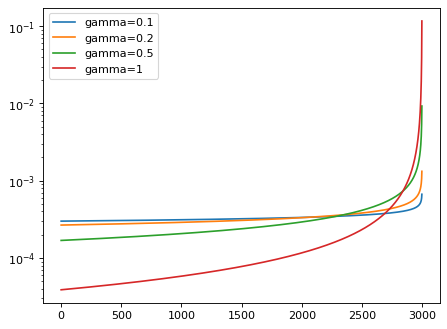

In [4]:
def mw(time, gamma):
    mixing = 1 / (time - np.arange(time)) ** gamma
    # mixing = np.arange(1, curr_time + 1) ** 0.1
    mixing_weights = mixing / mixing.sum()
    return mixing_weights

plt.yscale("log")
time = 3000
for gamma in [0.1, 0.2, 0.5, 1]:
    plt.plot(mw(time, gamma), label=f"gamma={gamma}")
plt.legend()
plt.show()

In [5]:
experiments = experiments_25 + experiments_22

In [6]:
needed_1 = {
    'train_window': [10],
}
vital = extract_needed(experiments, needed_1)

In [7]:
experiments_to_df(vital)

,noise_var,train_window,weight_function,mixing_type,alpha_function,mean,random_0,random_1,random_2,random_3
10,1,10,1 / ((x + 1) * (ln(x + 1))^2),decaying past,1 / (x + 1),122513.26,107298.24,99225.34,148746.25,134783.22
12,1,10,1 / (x^1.01),decaying past,1 / (x + 1),123066.72,107134.89,100184.69,148414.86,136532.43
3,1,10,1 / (x^1.01),decaying past-0.1,1 / (x + 1),110839.45,96141.55,92622.33,134327.77,120266.16
8,1,10,1 / (x^1.01),decaying past-0.2,1 / (x + 1),111215.36,96431.58,92949.05,134625.43,120855.4
6,1,10,1 / (x^1.01),decaying past-0.5,1 / (x + 1),113349.02,98236.3,94511.07,136772.66,123876.05
9,1,10,1 / c,decaying past,1 / (x + 1),128114.78,111494.88,102224.75,154495.88,144243.61
7,1,10,1 / c,decaying past-0.1,1 / (x + 1),120146.80,103720.59,99041.25,142517.35,135308.03
1,1,10,1 / c,decaying past-0.2,1 / (x + 1),120655.39,104187.64,99309.86,143233.36,135890.71
0,1,10,1 / c,decaying past-0.5,1 / (x + 1),122703.88,106107.26,100283.63,146199.7,138224.93
11,1,10,1 / (x^0.5),decaying past,1 / (x + 1),126191.99,109889.25,101789.98,151996.01,141092.71
